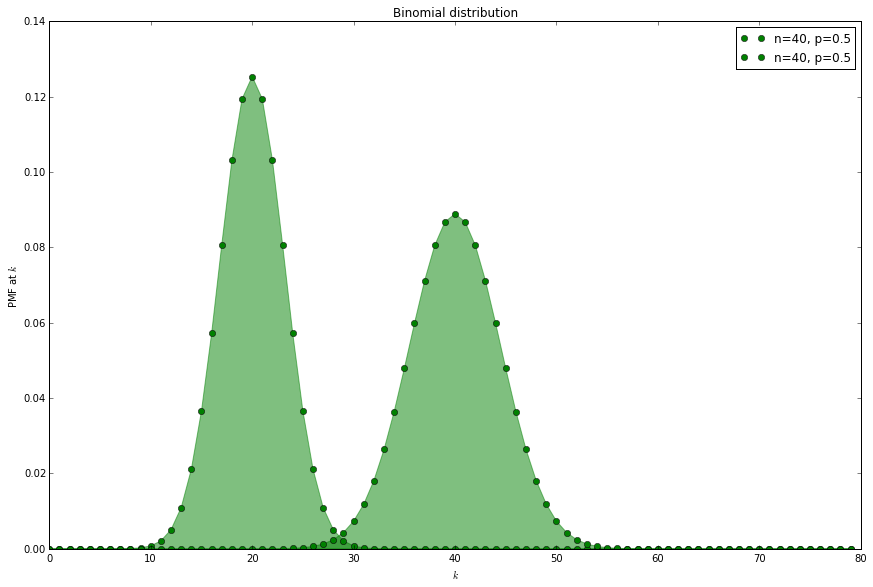

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from scipy.stats import binom

k = np.arange(0, 80)

plt.figure(figsize=(12,8))

#n, p = 20, 0.4
#plt.plot(k, binom.pmf(k, n, p), 'o', c='blue', label='n=20, p=0.4')
#plt.fill_between(k, binom.pmf(k, n, p), color='blue', alpha=0.5)

#n, p = 20, 0.7
#plt.plot(k, binom.pmf(k, n, p), 'o', c='red', label='n=20, p=0.7')
#plt.fill_between(k, binom.pmf(k, n, p), color='red', alpha=0.5)

n, p = 40, 0.5
plt.plot(k, binom.pmf(k, n, p), 'o', c='green', label='n=40, p=0.5')
plt.fill_between(k, binom.pmf(k, n, p), color='green', alpha=0.5)

n, p = 80, 0.5
plt.plot(k, binom.pmf(k, n, p), 'o', c='green', label='n=40, p=0.5')
plt.fill_between(k, binom.pmf(k, n, p), color='green', alpha=0.5)

plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PMF at $k$")
q=plt.xlabel("$k$")
plt.show()

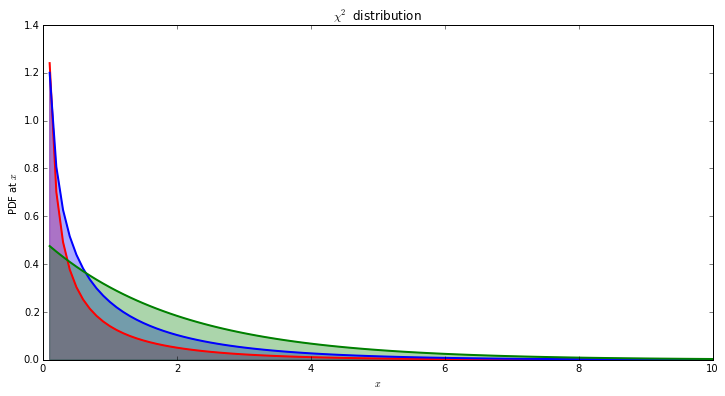

In [5]:
from scipy.stats import chi2
x = np.linspace(0.1, 10, 100)
ks = [0.5, 1, 2, 50]
colors=['red','blue','green']

plt.figure(figsize=(12,6))

for a,c in zip(ks,colors):
    label=r"$k$ = {0:.1f}".format(a)
    plt.plot(x, chi2.pdf(x, a), lw=2, color=c)
    plt.fill_between(x, chi2.pdf(x, a), color=c, alpha = .33)

plt.ylabel("PDF at $x$")
plt.xlabel("$x$")
plt.title("$\chi^2$ distribution")
plt.show()

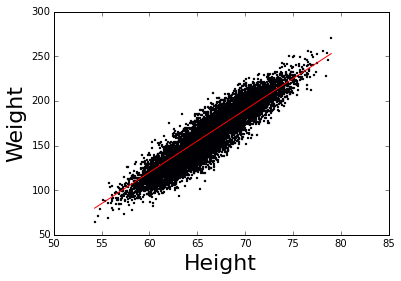

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter

df = pd.read_csv("../data/01_heights_weights_genders_errors.csv")
## Define the x,y variables from the datafile
x=df['Height']
y=df['Weight']
yerr = df['Weight errors']

## define a small subset for the example
inds = range(5)
xsub = x[inds]
ysub=y[inds]
yerrsub=yerr[inds]
#making a linear plotting vector to make things more attractive
linearx = np.sort(x)

## Plot the weights as a function of height
plt.clf()
#plt.errorbar(xsub,ysub,yerrsub, marker='.', linestyle='None')
#plt.plot(linearx, 200*np.ones(np.shape(inds)[0]), color='m')
#plt.plot(linearx,8*linearx-350, color='k')
plt.scatter(x,y,s=2.0)
plt.plot(linearx, 7*linearx -300, color='r') 
plt.xlabel('Height', fontsize=22)
plt.ylabel('Weight', fontsize=22)

In [8]:
tlin = 8*x - 350
xlin = (y - tlin)**2/yerr**2

print 'chi2 = ', np.sum(xlin)

chi2 =  587529721.739


In [9]:
def chi2_value(a,b):
    #given slope a and y-int b compute chi^2 of the linear fit model
    tlin = a*x - b
    xlin = (y - tlin)**2/yerr**2
    return np.sum(xlin)

In [10]:
a_grid = np.arange(6.64,6.68, 0.004)
b_grid = np.arange(277.396,277.404,0.0008)
minchi = float("inf")
amin = 0.0
bmin = 0.0
for a in a_grid:
    for b in b_grid:
        val = chi2_value(a,b)
        if (val < minchi): 
            minchi = val
            amin = a
            bmin = b
print minchi
print (amin,bmin)

67119851.0528
(6.663999999999997, 277.40320000000025)


In [11]:
chi2_value(6.65,275)

73629574.694327325

67215264.2425
(6.6599999999999984, 277)
67120434.3065
(6.663999999999997, 277.39999999999992)
67119851.0528
(6.663999999999997, 277.40320000000025)
